In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
!pip install split_folders

  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [7]:
import splitfolders

splitfolders.ratio('C:/Sem 5/Bangkit Academy 2023/Capstone/Original Tomato Dataset',
                    output='C:/Sem 5/Bangkit Academy 2023/Capstone/Datasetv1',
                    seed=1337,
                    ratio=(.9, .1)) 

In [2]:
base_dir = 'C:/Sem 5/Bangkit Academy 2023/Capstone/Datasetv1'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [3]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,           
                    ) 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(264, 264)
                                                    )
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  batch_size=64,
                                                  class_mode='categorical',
                                                  target_size=(264, 264)
                                                  )

Found 16290 images belonging to 10 classes.
Found 1816 images belonging to 10 classes.


In [5]:
class_dict=train_generator.class_indices
classes=list(class_dict.keys())
print ('LIST OF CLASSES ', classes)
print ('CLASS DICTIONARY ',class_dict)
number_of_classes=len(classes) 
print ('Number of classes = ', number_of_classes)

LIST OF CLASSES  ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
CLASS DICTIONARY  {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
Number of classes =  10


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(264, 264, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),                           
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                     
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')    
])

In [7]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (264, 264, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')
])

In [8]:
model.compile(optimizer ='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [9]:
history=model.fit(
      train_generator,
      steps_per_epoch=4,                    
      epochs=25,                            
      validation_data=test_generator,       
      verbose=2,
      validation_steps=4
      )

Epoch 1/25
4/4 - 5s - loss: 2.1904 - accuracy: 0.2070 - val_loss: 2.1747 - val_accuracy: 0.2852
Epoch 2/25
4/4 - 5s - loss: 2.2101 - accuracy: 0.2734 - val_loss: 2.1551 - val_accuracy: 0.2734
Epoch 3/25
4/4 - 5s - loss: 2.1759 - accuracy: 0.2773 - val_loss: 2.1521 - val_accuracy: 0.2852
Epoch 4/25
4/4 - 5s - loss: 2.0820 - accuracy: 0.3047 - val_loss: 2.0565 - val_accuracy: 0.3203
Epoch 5/25
4/4 - 5s - loss: 2.1144 - accuracy: 0.2383 - val_loss: 2.0319 - val_accuracy: 0.2734
Epoch 6/25
4/4 - 8s - loss: 1.9807 - accuracy: 0.3047 - val_loss: 1.8893 - val_accuracy: 0.3047
Epoch 7/25
4/4 - 11s - loss: 1.9561 - accuracy: 0.2539 - val_loss: 1.9312 - val_accuracy: 0.2539
Epoch 8/25
4/4 - 10s - loss: 1.8201 - accuracy: 0.2891 - val_loss: 1.8236 - val_accuracy: 0.2461
Epoch 9/25
4/4 - 11s - loss: 1.7045 - accuracy: 0.3320 - val_loss: 1.6810 - val_accuracy: 0.3086
Epoch 10/25
4/4 - 7s - loss: 1.7293 - accuracy: 0.2852 - val_loss: 1.6223 - val_accuracy: 0.2734
Epoch 11/25
4/4 - 5s - loss: 1.5760 

In [12]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


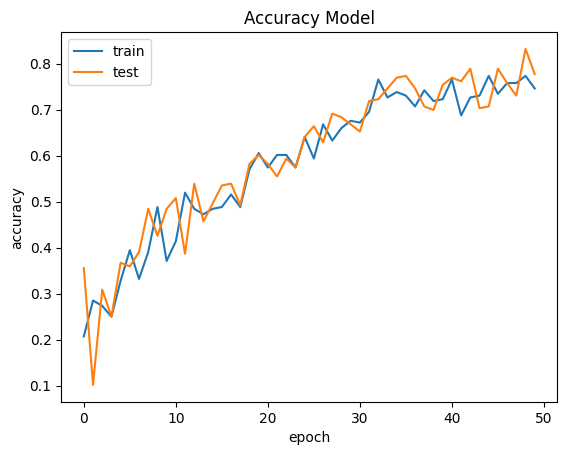

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

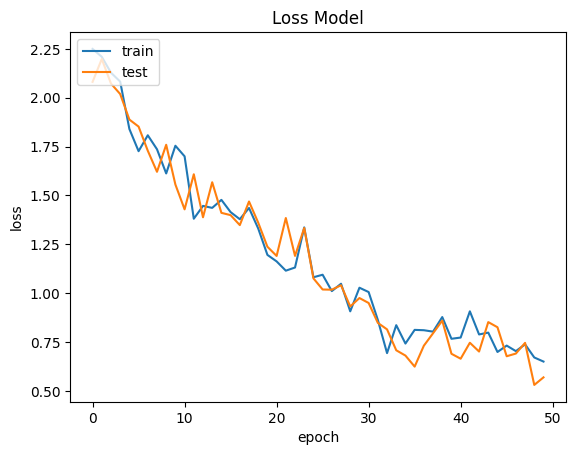

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
for images_batch, label_batch in validation_dir.take(1):

    first_img = images_batch[0].numpy().astype('uint8')
    first_lbl = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_img)
    print("actual label: ", classes[first_lbl])

    model.predict()

AttributeError: 'str' object has no attribute 'take'

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)